Animations of daily averages U, V, and W velocities. Each animation has subplots representing various depths.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from salishsea_tools.nc_tools import scDataset
from matplotlib import animation

import sys
sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

%matplotlib inline

In [2]:
def get_files(dirname, fname, grid):
    files = []    
    for item in os.listdir(dirname):
        if fnmatch.fnmatchcase(item, fname + grid + "*.nc"):
            files += [os.path.join(dirname, item)]
    files.sort(key=os.path.basename)
    return files

In [3]:
def U_timeseries(dirname, fname, dep_ind):
    
    filesU = get_files(dirname, fname, 'grid_U')
    y,x = slice(1,-1,None), slice(1,-1,None)

    with scDataset(filesU) as dsU:
        vozocrtx0 = dsU.variables['vozocrtx'][:,dep_ind,y,x]

    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
        umask0 = dsM.variables['umask'][0,dep_ind,y,x]

    umask = np.tile(umask0, (480, 1, 1))
    vozocrtx = np.ma.array(vozocrtx0, mask=1 - umask)
    print(dep_ind)
    
    return vozocrtx

In [4]:
def get_1day_avg(vel, day_start, day_end):
    day = slice(day_start*24, day_end*24, None)
    vel_day = np.mean(vel[day, ...], axis=0)
    return vel_day

In [5]:
dirname='/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
fname = "1_MCKNZ_1h_20170101_20170120_*"
dep_inds = [5, 9, 10, 11, 12, 18, 22, 30, 40]

In [6]:
filesU = get_files(dirname, fname, 'grid_U')
with scDataset(filesU) as dsU:
    depthu = dsU.variables['depthu'][:]

In [7]:
vozocrtxA = U_timeseries(dirname, fname, dep_inds[0])
vozocrtxB = U_timeseries(dirname, fname, dep_inds[1])
vozocrtxC = U_timeseries(dirname, fname, dep_inds[2])
vozocrtxD = U_timeseries(dirname, fname, dep_inds[3])
vozocrtxE = U_timeseries(dirname, fname, dep_inds[4])
vozocrtxF = U_timeseries(dirname, fname, dep_inds[5])
vozocrtxG = U_timeseries(dirname, fname, dep_inds[6])
vozocrtxH = U_timeseries(dirname, fname, dep_inds[7])
vozocrtxI = U_timeseries(dirname, fname, dep_inds[8])

xs = np.arange(vozocrtxA.shape[-1])
ys = np.arange(vozocrtxA.shape[-2])

5
9
10
11
12
18
22
30
40


In [17]:
def animate(time_ind):
    for ax, n, vel_all in zip(axes.flatten(), np.arange(len(dep_inds)), vel_all_list):
        ax.cla()
        vel_dayn = get_1day_avg(vel_all, time_ind, time_ind+1)
        p = ax.pcolormesh(xs, ys, vel_dayn, vmin=-0.1, vmax=0.1, cmap=cmap)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xlim([0, xs[-1]])
        ax.set_ylim([0, ys[-1]])
        ax.set_title('Depth '+str(np.round(depthu[dep_inds[n]],1)), fontsize=16)
    fig.tight_layout(w_pad=0.8, h_pad=0.5)
    fig.suptitle(ttl + 'Profile on Day ' + str(time_ind+1), fontsize=20)
    plt.subplots_adjust(top=0.92)
    return p,

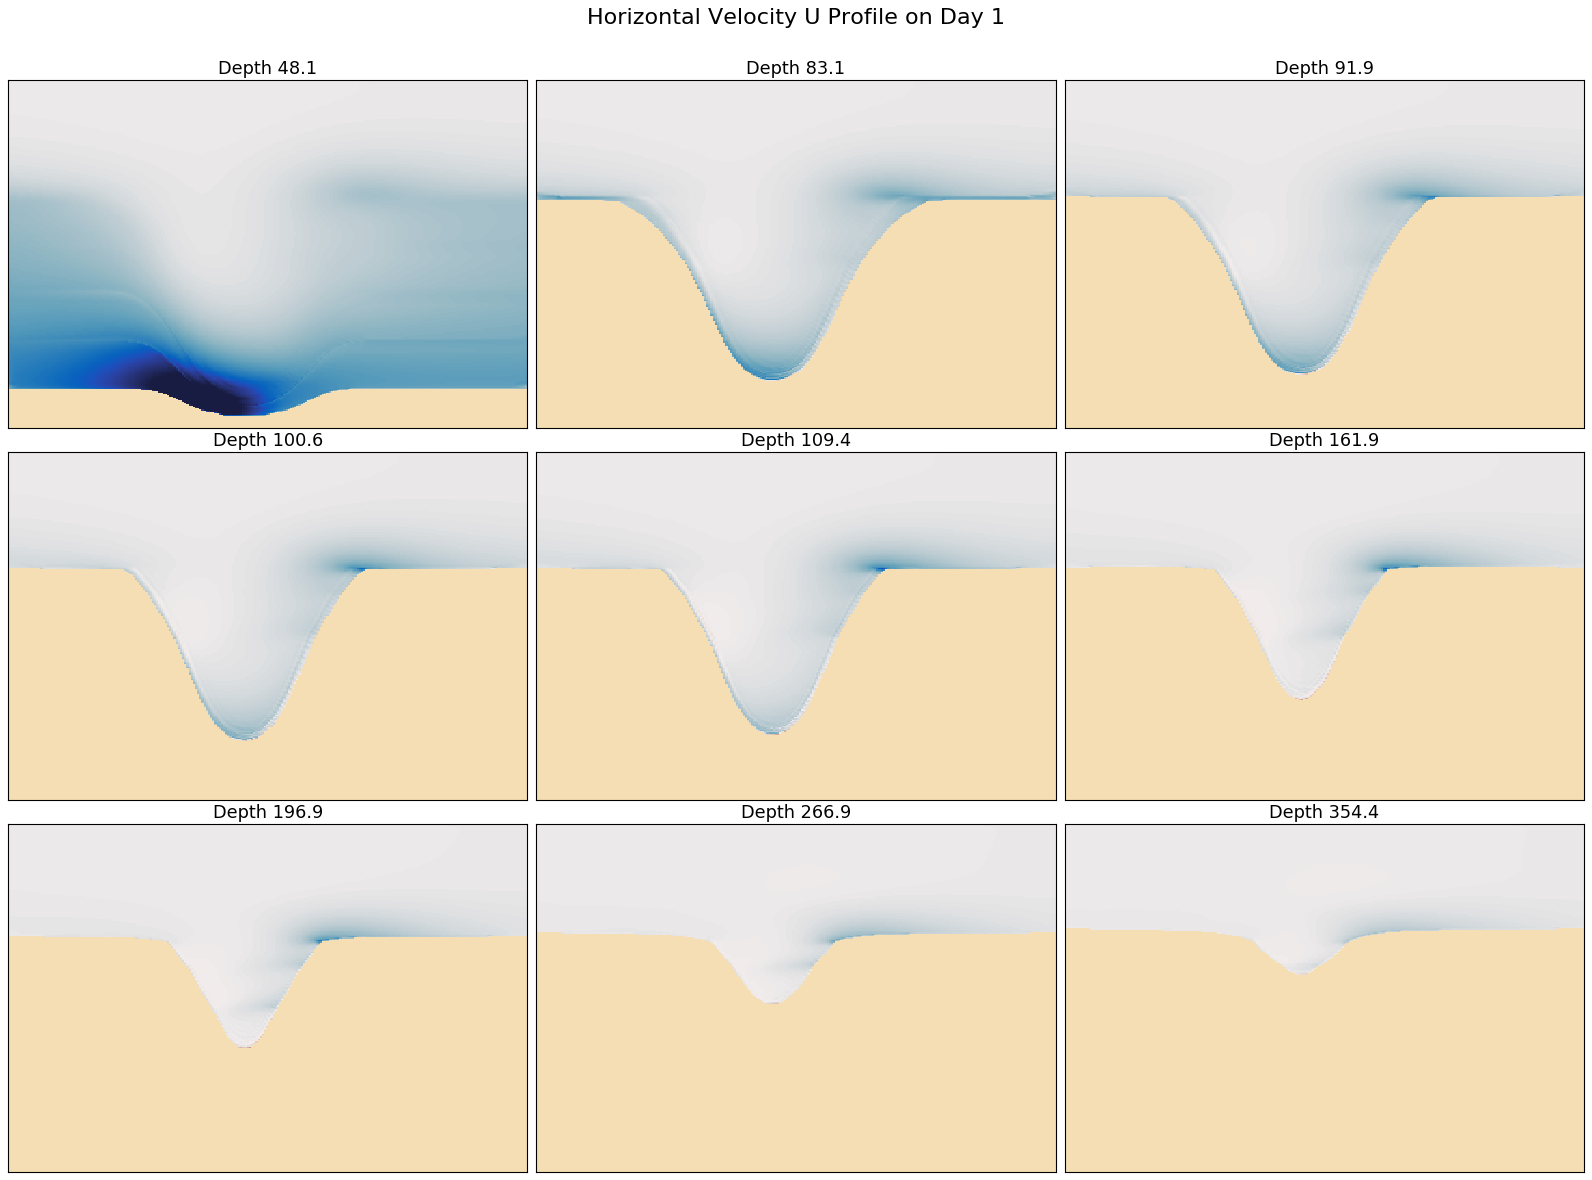

In [18]:
ttl = 'Horizontal Velocity U '
vel_all_list = [vozocrtxA, vozocrtxB, vozocrtxC, vozocrtxD, vozocrtxE, vozocrtxF, vozocrtxG, vozocrtxH, vozocrtxI]

fig, axes = plt.subplots(3, 3, figsize=(20,15), sharey=True)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('wheat')

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, bitrate=1000000, codec="libx264")
anim = animation.FuncAnimation(fig, animate, frames=17)
anim.save('uvel_depths.mp4', writer=writer)

In [22]:
def V_timeseries(dirname, fname, dep_ind):
    
    filesU = get_files(dirname, fname, 'grid_V')
    y,x = slice(1,-1,None), slice(1,-1,None)

    with scDataset(filesV) as dsV:
        vomecrty0 = dsV.variables['vomecrty'][:,dep_ind,y,x]

    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
        vmask0 = dsM.variables['vmask'][0,dep_ind,y,x]

    vmask = np.tile(vmask0, (480, 1, 1))
    vomecrty = np.ma.array(vomecrty0, mask=1 - vmask)
    print(dep_ind)
    
    return vomecrty

In [23]:
filesV = get_files(dirname, fname, 'grid_V')
with scDataset(filesV) as dsV:
    depthv = dsV.variables['depthv'][:]

In [24]:
vomecrtyA = V_timeseries(dirname, fname, dep_inds[0])
vomecrtyB = V_timeseries(dirname, fname, dep_inds[1])
vomecrtyC = V_timeseries(dirname, fname, dep_inds[2])
vomecrtyD = V_timeseries(dirname, fname, dep_inds[3])
vomecrtyE = V_timeseries(dirname, fname, dep_inds[4])
vomecrtyF = V_timeseries(dirname, fname, dep_inds[5])
vomecrtyG = V_timeseries(dirname, fname, dep_inds[6])
vomecrtyH = V_timeseries(dirname, fname, dep_inds[7])
vomecrtyI = V_timeseries(dirname, fname, dep_inds[8])

xs = np.arange(vomecrtyA.shape[-1])
ys = np.arange(vomecrtyA.shape[-2])

5
9
10
11
12
18
22
30
40


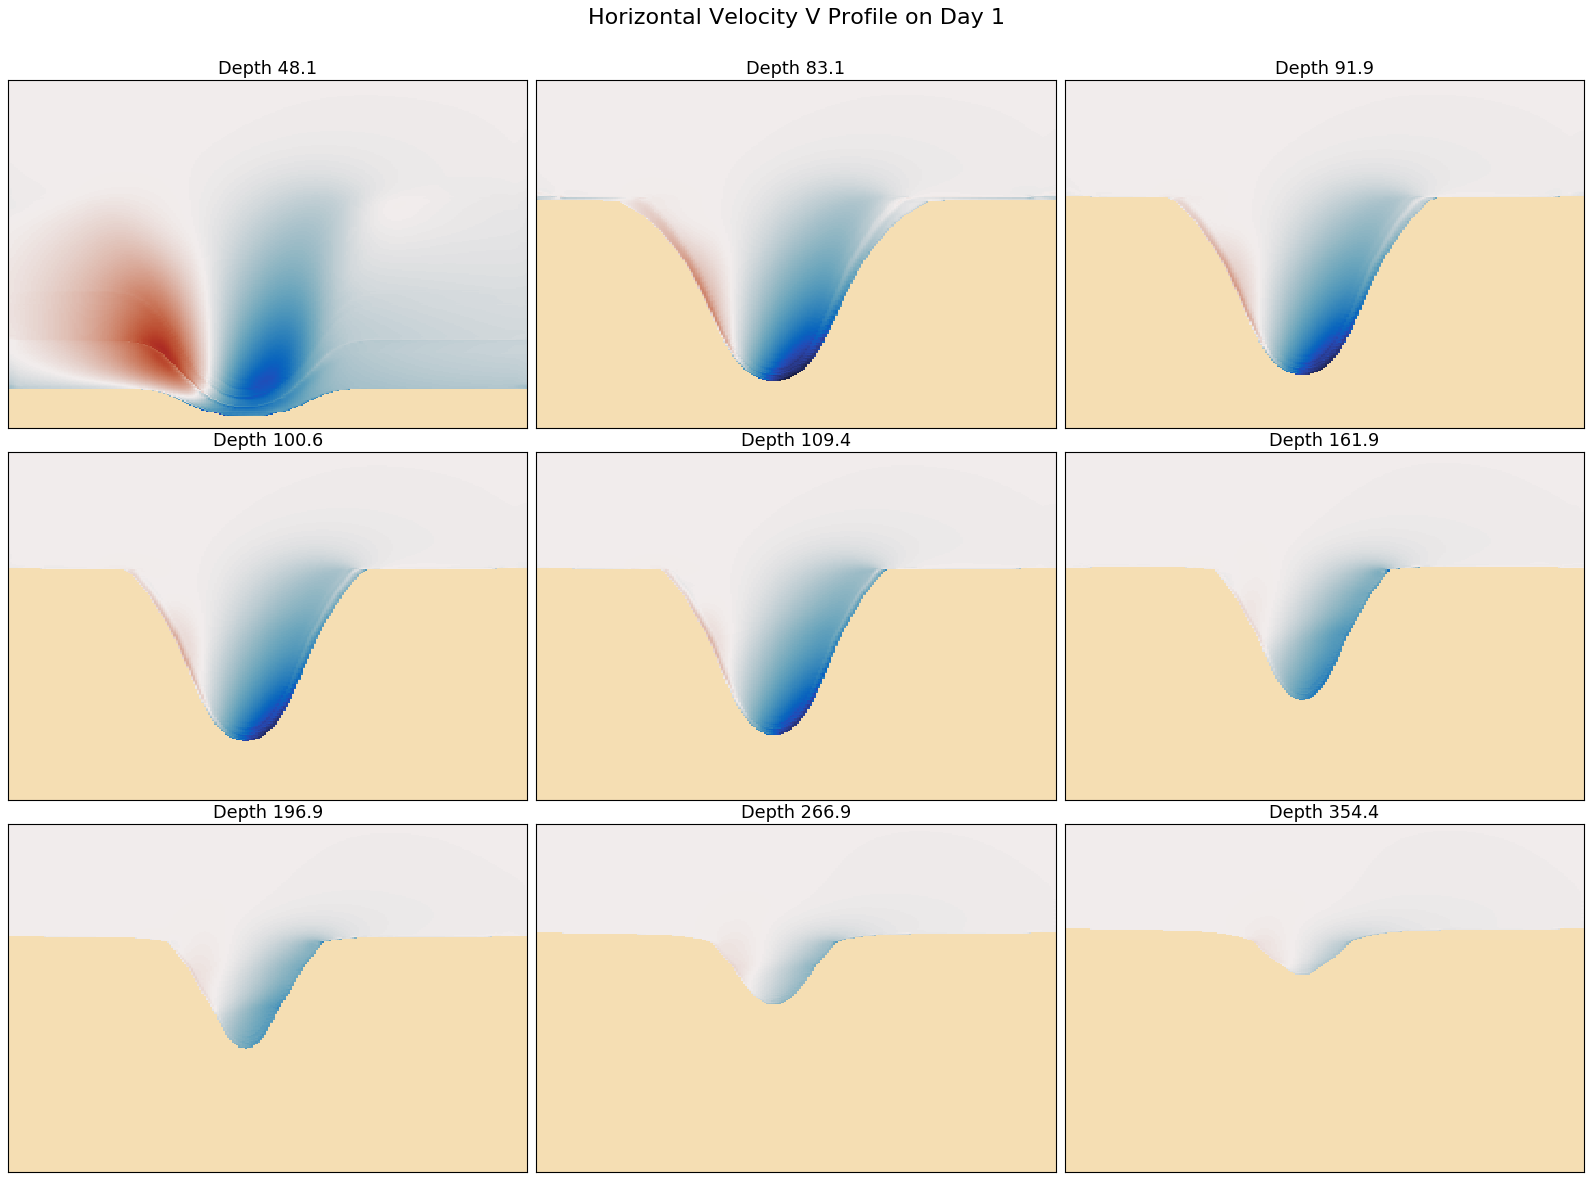

In [25]:
ttl = 'Horizontal Velocity V '
vel_all_list = [vomecrtyA, vomecrtyB, vomecrtyC, vomecrtyD, vomecrtyE, vomecrtyF, vomecrtyG, vomecrtyH, vomecrtyI]

fig, axes = plt.subplots(3, 3, figsize=(20,15), sharey=True)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('wheat')

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, bitrate=1000000, codec="libx264")
anim = animation.FuncAnimation(fig, animate, frames=17)
anim.save('vvel_depths.mp4', writer=writer)

In [6]:
def W_timeseries(dirname, fname, dep_ind):
    
    filesW = get_files(dirname, fname, 'grid_W')
    y,x = slice(1,-1,None), slice(1,-1,None)

    with scDataset(filesW) as dsW:
        vovecrtz0 = dsW.variables['vovecrtz'][:,dep_ind,y,x]

    with nc.Dataset(os.path.join(dirname, '1_mesh_mask.nc'), 'r') as dsM:
        tmask0 = dsM.variables['tmask'][0,dep_ind,y,x]

    tmask = np.tile(tmask0, (480, 1, 1))
    vovecrtz = np.ma.array(vovecrtz0, mask=1 - tmask)
    print(dep_ind)
    
    return vovecrtz

In [7]:
def animateW(time_ind):
    for ax, n, vel_all in zip(axes.flatten(), np.arange(len(dep_inds)), vel_all_list):
        ax.cla()
        vel_dayn = get_1day_avg(vel_all, time_ind, time_ind+1)
        p = ax.pcolormesh(xs, ys, vel_dayn, vmin=-0.0001, vmax=0.0001, cmap=cmap)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        ax.set_xlim([0, xs[-1]])
        ax.set_ylim([0, ys[-1]])
        ax.set_title('Depth '+str(np.round(deptht[dep_inds[n]],1)), fontsize=16)
    fig.tight_layout(w_pad=0.8, h_pad=0.5)
    fig.suptitle(ttl + 'Profile on Day ' + str(time_ind+1), fontsize=20)
    plt.subplots_adjust(top=0.92)
    return p,

In [8]:
filesT = get_files(dirname, fname, 'grid_T')
with scDataset(filesT) as dsT:
    deptht = dsT.variables['deptht'][:]

In [9]:
vovecrtzA = W_timeseries(dirname, fname, dep_inds[0])
vovecrtzB = W_timeseries(dirname, fname, dep_inds[1])
vovecrtzC = W_timeseries(dirname, fname, dep_inds[2])
vovecrtzD = W_timeseries(dirname, fname, dep_inds[3])
vovecrtzE = W_timeseries(dirname, fname, dep_inds[4])
vovecrtzF = W_timeseries(dirname, fname, dep_inds[5])
vovecrtzG = W_timeseries(dirname, fname, dep_inds[6])
vovecrtzH = W_timeseries(dirname, fname, dep_inds[7])
vovecrtzI = W_timeseries(dirname, fname, dep_inds[8])

xs = np.arange(vovecrtzA.shape[-1])
ys = np.arange(vovecrtzA.shape[-2])

5
9
10
11
12
18
22
30
40


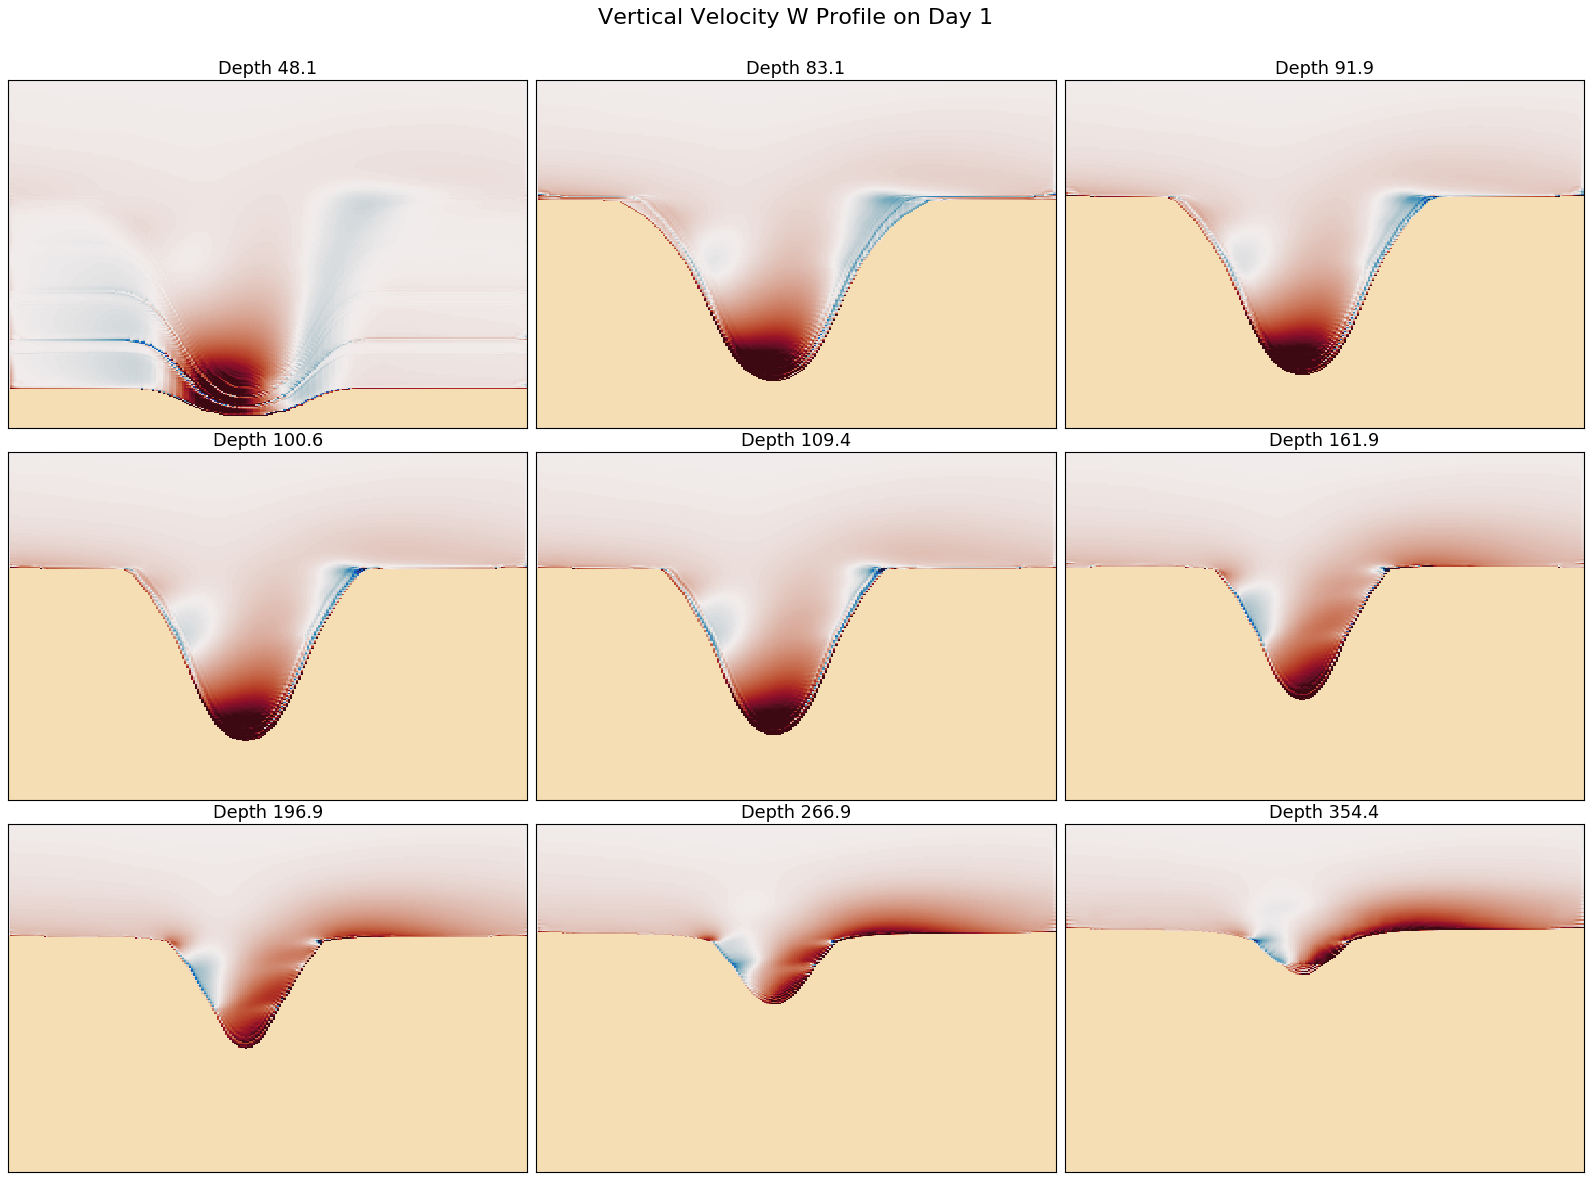

In [10]:
ttl = 'Vertical Velocity W '
vel_all_list = [vovecrtzA, vovecrtzB, vovecrtzC, vovecrtzD, vovecrtzE, vovecrtzF, vovecrtzG, vovecrtzH, vovecrtzI]

fig, axes = plt.subplots(3, 3, figsize=(20,15), sharey=True)
cmap = plt.get_cmap(cmo.cm.balance)
cmap.set_bad('wheat')

Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, bitrate=1000000, codec="libx264")
anim = animation.FuncAnimation(fig, animateW, frames=17)
anim.save('wvel_depths.mp4', writer=writer)